In [118]:
# Dependencies
import requests
import pandas as pd
import json
import numpy as np
import pprint as pprint
import matplotlib.pyplot as plt
import nasdaqdatalink as nas
from pathlib import Path

In [101]:
raw_data= pd.read_csv("Resources/zillow_data.csv")
raw_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
0,61148,0,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,132227.158462,...,513064.819267,521106.942820,526709.757886,529852.723408,532739.517232,536614.909083,539756.911224,542498.833639,544796.246875,548908.778223
1,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,222152.961968,...,483238.626925,487008.197655,487740.644864,486249.969249,484563.782495,483155.040379,481172.398003,478960.458716,477829.581123,478617.619647
2,91940,2,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,112898.162200,...,279587.901824,282543.997782,284092.001252,284287.573977,283684.397980,282690.504761,281117.092555,279305.188642,277752.055947,276950.323631
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,72326.248058,...,323320.422839,323582.127606,322854.935372,321141.219564,319297.240310,318652.879789,317396.440188,317356.363695,317934.056006,320049.843886
4,92593,4,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,181767.202252,...,463719.895826,463689.682953,460142.037448,454155.731421,447851.951556,441110.142904,434006.030604,427856.292727,422973.617117,419470.057769


In [102]:
#CLEAN DATA

#Remove non-relevant years
df = raw_data.drop(raw_data.columns[8:216], axis=1)
#Remove NaN rows
df.dropna(inplace=True)
#Filter by state = Texas
df=df.loc[df['State'] == "TX"]
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,2017-04-30,2017-05-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
1,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",343068.942359,343482.438148,...,483238.626925,487008.197655,487740.644864,486249.969249,484563.782495,483155.040379,481172.398003,478960.458716,477829.581123,478617.619647
2,91940,2,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",183613.214671,184026.638486,...,279587.901824,282543.997782,284092.001252,284287.573977,283684.397980,282690.504761,281117.092555,279305.188642,277752.055947,276950.323631
4,92593,4,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",282862.635342,283559.846782,...,463719.895826,463689.682953,460142.037448,454155.731421,447851.951556,441110.142904,434006.030604,427856.292727,422973.617117,419470.057769
6,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",134773.629362,135335.860054,...,187682.181121,189673.422183,191243.674118,192305.236231,193063.807323,193840.481225,194377.210218,195357.486876,196526.739646,198047.393260
9,91733,9,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",183457.652075,184167.284873,...,271780.587717,273971.396421,274979.401096,275216.378920,275115.598231,274842.352854,273919.763511,272495.581068,271222.301521,270638.716372


In [103]:
#Check Columns
print(df.count())

RegionID      1028
SizeRank      1028
RegionName    1028
RegionType    1028
StateName     1028
              ... 
2022-11-30    1028
2022-12-31    1028
2023-01-31    1028
2023-02-28    1028
2023-03-31    1028
Length: 80, dtype: int64


In [104]:
#Check Format
print(df.loc['2017-04-30':'2023-03-31',:].dtypes)

RegionID        int64
SizeRank        int64
RegionName      int64
RegionType     object
StateName      object
               ...   
2022-11-30    float64
2022-12-31    float64
2023-01-31    float64
2023-02-28    float64
2023-03-31    float64
Length: 80, dtype: object


In [105]:
#Calculates the Variance of values is each row and puts the result in a new column ***Reset all above before runnning this***
# ***Not returning correct values, need to fix***
df["Variance"]=df.var(axis=1, numeric_only=True)
df["Mean Value"]=df.mean(axis=1, numeric_only=True)

In [106]:
#Add columns that calculate percent change over time

#Total
df['Total Change']=(df['2023-03-31']-df['2017-04-30'])/df['2017-04-30']
#df1['Total Change'] = df1['Total Change'].map("{:.2%}".format)

#For each year
df['2017 % Change']=(df['2017-12-31']-df['2017-04-30'])/df['2017-04-30']
#df['2017-2018 % Change'] = df['2017-2018 % Change'].map("{:.2%}".format)
df['2018 % Change']=(df['2018-12-31']-df['2017-12-31'])/df['2017-12-31']
df['2019 % Change']=(df['2019-12-31']-df['2018-12-31'])/df['2018-12-31']
df['2020 % Change']=(df['2020-12-31']-df['2019-12-31'])/df['2019-12-31']
df['2021 % Change']=(df['2021-12-31']-df['2020-12-31'])/df['2020-12-31']
df['2022 % Change']=(df['2022-12-31']-df['2021-12-31'])/df['2021-12-31']

In [107]:
#Can use this to sort top/bottom
#top_20 = df[['RegionName', 'City', 'State', 'Total Change']].sort_values(by='Total Change', ascending=False).head(20)
#top_20

In [108]:
#Creates a Summary df
df_summary=df[['RegionID', 'City', '2017 % Change', 
        '2018 % Change', '2019 % Change', '2020 % Change',
        '2021 % Change', '2022 % Change', 'Total Change','Variance','Mean Value']]
df_summary


,RegionID,City,2017 % Change,2018 % Change,2019 % Change,2020 % Change,2021 % Change,2022 % Change,Total Change,Variance,Mean Value
1,91982,Katy,0.006868,0.012020,0.009230,0.051875,0.180140,0.098678,0.395106,6.863252e+09,9.067423e+07
2,91940,Katy,0.026914,0.054374,0.038191,0.062672,0.144079,0.120267,0.508335,2.148057e+09,2.847589e+07
4,92593,Pflugerville,0.015033,0.031728,0.030619,0.112484,0.230932,0.038123,0.482946,7.029436e+09,9.282106e+07
6,93144,El Paso,0.000052,0.034652,0.027042,0.086674,0.110453,0.124697,0.469482,8.425093e+08,1.123471e+07
9,91733,Houston,0.020438,0.040363,0.051769,0.065771,0.129942,0.110390,0.475211,2.003173e+09,2.656660e+07
...,...,...,...,...,...,...,...,...,...,...,...
26202,92496,Hargill,-0.029468,0.203088,0.089029,0.349925,-0.007439,0.223972,1.274256,2.317240e+08,3.101572e+06
26451,92522,Progreso,-0.013520,0.087237,0.199947,0.236104,0.037752,0.209678,0.978181,3.840366e+08,5.130192e+06
26744,92436,Corpus Christi,0.013920,0.008686,0.022627,0.120858,0.244024,0.106824,0.651865,3.309281e+08,4.443218e+06
26813,92406,Rockport,0.036373,0.074092,0.050548,0.102354,0.138231,0.084861,0.564856,1.606588e+09,2.133172e+07


In [111]:
#Saves Summary df to csv
df_summary.to_csv("sample.csv", index=True)

In [112]:
df_summary.describe(include='float64')

,2017 % Change,2018 % Change,2019 % Change,2020 % Change,2021 % Change,2022 % Change,Total Change,Variance,Mean Value
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1.028000e+03,1.028000e+03
mean,0.038300,0.062299,0.052763,0.090468,0.153252,0.091394,0.613137,4.415711e+09,5.833272e+07
std,0.032069,0.047861,0.041585,0.040313,0.070615,0.062127,0.242345,9.740992e+09,1.282855e+08
min,-0.056277,-0.072419,-0.139346,-0.051946,-0.091566,-0.248341,0.033231,6.131961e+07,8.757075e+05
25%,0.016658,0.031478,0.027180,0.065121,0.106345,0.062439,0.456027,9.463899e+08,1.260241e+07
50%,0.034742,0.053897,0.049191,0.083510,0.144234,0.096151,0.569003,2.050252e+09,2.718070e+07
75%,0.057664,0.082784,0.073423,0.111528,0.196839,0.123872,0.745932,4.345966e+09,5.742652e+07
max,0.241997,0.334328,0.238576,0.349925,0.451581,0.322982,1.810002,1.740124e+11,2.290857e+09


In [113]:
#Boxplot of Variance
# plt.boxplot(df['Variance'], showmeans=True, flierprops=dict(markerfacecolor='red', marker='s'))
# plt.title("Boxplot of Variance")
# plt.ylabel("Variance")
# plt.show()

In [114]:
#Boxplot of Mean
# plt.boxplot(df['Mean Value'], showmeans=True, flierprops=dict(markerfacecolor='red', marker='s'))
# plt.title("Mean Housing Value by Zip")
# plt.ylabel("Mean")
# plt.show()

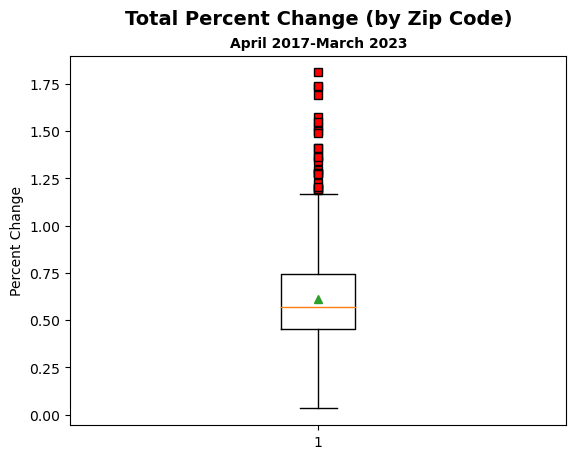

In [115]:
#Boxplot of Total Change %
plt.boxplot(df['Total Change'], showmeans=True, flierprops=dict(markerfacecolor='red', marker='s'))
plt.title("April 2017-March 2023", fontsize=10, fontweight='bold', color='black')
plt.text(0.5, 1.1, "Total Percent Change (by Zip Code)", ha='center', va='center', fontsize=14, fontweight='bold', color='black', transform=plt.gca().transAxes)
plt.ylabel("Percent Change")
plt.show()


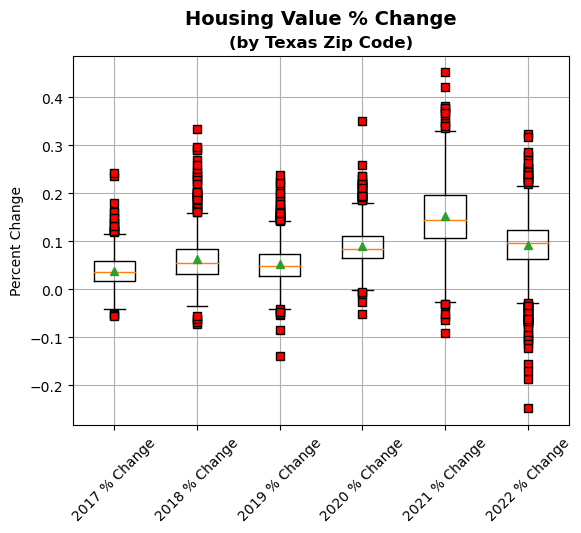

In [116]:
#Boxplot of Change % by year
data= [df['2017 % Change'], df['2018 % Change'], df['2019 % Change'], 
        df['2020 % Change'], df['2021 % Change'], df['2022 % Change']]
labels=['2017 % Change', 
        '2018 % Change', '2019 % Change', '2020 % Change',
        '2021 % Change', '2022 % Change']
plt.boxplot(data, labels=labels, 
        showmeans=True, flierprops=dict(markerfacecolor='red', marker='s'))
plt.xticks(rotation=45)
plt.text(0.5, 1.1, "Housing Value % Change", ha='center', va='center', fontsize=14, fontweight='bold', color='black', transform=plt.gca().transAxes)
plt.title("(by Texas Zip Code)", fontsize=12, fontweight='bold', color='black')
plt.grid()
plt.ylabel("Percent Change")
plt.show()


In [117]:
#Scatterplot/Regression ideas: 
# Mean Home Price vs Average Income
# Mean Home Price vs Crime Rate
# Mean Home Price vs Environmental Violations
# Mean Home Price vs Education Factors
# Mean Home Price vs Public Health


#Define Regression Function
# def linear_reg(x,y,data_f):

#     fig, ax = plt.subplots()

#     data_x = data_f.groupby('City').mean()[x]
#     data_y = data_f.groupby('City').mean()[y]

# # Incorporate the other graph properties
#     for color in ['tab:blue']:
#          ax.scatter(data_x, data_y, c=color, label="Set 1",
#                alpha=0.5, edgecolors='black')
    
#     # Fit a linear trendline to the data
#     z = np.polyfit(data_x, data_y, 1)
#     p = np.poly1d(z)
#     ax.plot(data_x, p(data_x), c="red", linewidth=2)

#     # Add the y=mx+b equation to the plot
#     equation = f"y = {z[0]:.2f}x + {z[1]:.2f}"
#     ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=12,
#             verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', alpha=0.8))

#     ax.set_xlabel(x)
#     ax.set_ylabel(y)
#     ax.grid(True)

#     r_value = st.pearsonr(data_y, data_x)
#     print(f'the R Value is {round(r_value[0],2)}')

# # Show plot
# plt.show()
 